In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
##column name
passengerId='PassengerId'
surveived='Survived'
pclass='Pclass'
name='Name'
sex='Sex'
age='Age'
sibsp='SibSp'
parch='Parch'
ticket='Ticket'
fare='Fare'
cabin='Cabin'
embarked='Embarked'

In [4]:
train_data=load_data('train.csv')

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# first think
1. 题目的目标是预测一个人是不是会遇难（survived：0遇难，1幸存）
2. 显然无关的属性：ticket（票的ID），fare（票价），Name
3. 可能有关的属性：cabin（船舱），Embarked（登陆地），sibsp（同辈人数），parch（长辈子辈人数）
4. 极可能有关的：pclass（船舱等级），Sex（性别，女人的概率高些），Age（年龄，小孩高一些）

In [5]:
##test the relation between pclass and survived
pclass_group_data=train_data.groupby([pclass])[surveived]
pclass_group_data=pd.concat([pclass_group_data.size(),pclass_group_data.sum()],axis=1,keys=['size',surveived])
pclass_group_data['propotion']=pclass_group_data.apply(lambda x:float(x[surveived])/float(x['size']),axis=1)
pclass_group_data

,size,Survived,propotion
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


just as show above,people when pclass=1 have more oppotunity to survive

In [6]:
def get_propotion_frame(n):
    group_data=train_data.groupby([n])[surveived]
    group_data=pd.concat([group_data.size(),group_data.sum()],axis=1,keys=['size',n])
    group_data['propotion']=group_data.apply(lambda x:float(x[n])/float(x['size']),axis=1)
    return group_data

print "sex:"
get_propotion_frame(sex)

sex:


,size,Sex,propotion
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


it is easy to say female is more likely to survive

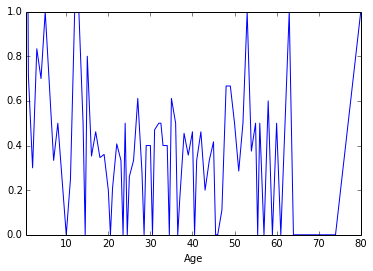

In [12]:
age_propotion=get_propotion_frame(age)
age_propotion['propotion'].plot()

just as see above age has impact